In [137]:
import pandas as pd
import numpy as np


train = pd.read_csv('D:\\Dataset\\titanic\\train.csv')
test = pd.read_csv('D:\\Dataset\\titanic\\test.csv')

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


We don't need the passengerID since its just an ID for passenger identification.

In [138]:
train.drop('PassengerId', axis = 1, inplace= True)
test.drop('PassengerId', axis = 1, inplace= True)


In [139]:
train.describe()


,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Lot of data missing in 'Age' column. We can fill the dta with median value

In [140]:
train.fillna(train['Age'].median(),axis = 1,inplace = True)

train["Cabin"] =train["Cabin"].replace(28,"U")

df1 = train[train.isna().any(axis=1)]
df1

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


Time for some data anlaysis to find some patterns and relations

Text(0, 0.5, 'Count')

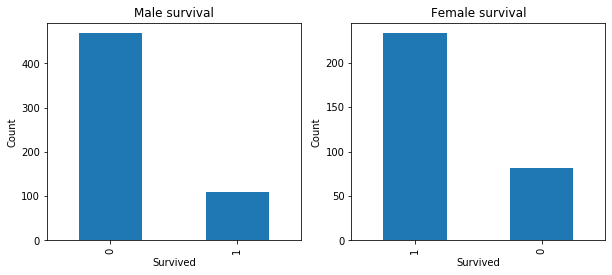

In [141]:
import seaborn as sns
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10,4))

fig.add_subplot(121)
men_survive = train['Survived'][train['Sex'] == 'male'].value_counts().plot(kind ='bar')
plt.title('Male survival')
plt.xlabel('Survived')
plt.ylabel('Count')

fig.add_subplot(122)
fem_survive = train['Survived'][train['Sex'] == 'female'].value_counts().plot(kind ='bar')
plt.title('Female survival')
plt.xlabel('Survived')
plt.ylabel('Count')



Text(0, 0.5, 'Count')

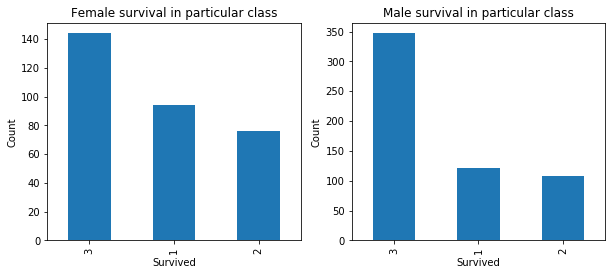

In [142]:
fig = plt.figure(figsize=(10,4))
fig.add_subplot(121)
fem_survive = train['Pclass'][train['Sex'] == 'female'].value_counts().plot(kind ='bar')
plt.title('Female survival in particular class')
plt.xlabel('Survived')
plt.ylabel('Count')

fig.add_subplot(122)
fem_survive = train['Pclass'][train['Sex'] == 'male'].value_counts().plot(kind ='bar')
plt.title('Male survival in particular class')
plt.xlabel('Survived')
plt.ylabel('Count')

We can see that female count is more than the male count for survival

Lets encode category variables into numerical values

In [143]:
sex_en = {"male":1,"female":0}
train["Embarked"].value_counts()
em_en = {"S":0,"C":1,"Q":2} 



train['Sex'] = train['Sex'].map(sex_en)
test['Sex'] = test['Sex'].map(sex_en)

train["Embarked"] = train["Embarked"].map(em_en)
test["Embarked"] = test["Embarked"].map(em_en)

train["Embarked"].value_counts()

df1 = train[train.isna().any(axis=1)]

train['Embarked'].fillna("0",inplace = True)

df1 = train[train.isna().any(axis=1)]
df1

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [144]:
train["Name"] = train["Name"].map(lambda x : x.split(",")[1].split(".")[0].strip())

print("Total title categories of travellers")

print(train["Name"].value_counts())

print("Total title categories of travellers who survived")
print(train["Name"][train["Survived"] == 1].value_counts())


Total title categories of travellers
Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Col               2
Major             2
Jonkheer          1
Capt              1
Lady              1
Sir               1
Ms                1
Mme               1
Don               1
the Countess      1
Name: Name, dtype: int64
Total title categories of travellers who survived
Miss            127
Mrs              99
Mr               81
Master           23
Dr                3
Mlle              2
Sir               1
Col               1
Major             1
Mme               1
the Countess      1
Lady              1
Ms                1
Name: Name, dtype: int64


In [145]:

train["Cabin"] = train["Cabin"].replace(28,"U")

train['Cabin'] = train['Cabin'].map(lambda x: x[0])

train["Cabin"].value_counts()

U    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: Cabin, dtype: int64

In [146]:
cabin_map = {
    'T': 0,
    'U': 1,
    'A': 2,
    'G': 3,
    'C': 4,
    'F': 5,
    'B': 6,
    'E': 7,
    'D': 8
}

title_map = {
    'Don': 0,
    'Rev': 0,
    'Jonkheer': 0,
    'Capt': 0,
    'Mr': 1,
    'Dr': 2,
    'Col': 3,
    'Major': 3,
    'Master': 4,
    'Miss': 5,
    'Mrs': 6,
    'Mme': 7,
    'Ms': 7,
    'Mlle': 7,
    'Sir': 7,
    'Lady': 7,
    'the Countess': 7
}
train["Cabin"] = train["Cabin"].map(cabin_map)
train["Name"] = train["Name"].map(title_map)
train.head()
df1 = train[train.isna().any(axis=1)]
df1

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [147]:
train.drop('Ticket', axis = 1, inplace= True)
train.head()
df1 = train[train.isna().any(axis=1)]
df1

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked


In [148]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

#train["Survived"] = scaler.fit_transform(train["Survived"]).reshape(-1,1)
train["Pclass"] = scaler.fit_transform(train["Pclass"].values.reshape(-1,1))
train["Name"] = scaler.fit_transform(train["Name"].values.reshape(-1,1))
#train["Sex"] = scaler.fit_transform(train["Sex"]).reshape(-1,1)
train["Age"] = scaler.fit_transform(train["Age"].values.reshape(-1,1))
train["SibSp"] = scaler.fit_transform(train["SibSp"].values.reshape(-1,1))
train["Parch"] = scaler.fit_transform(train["Parch"].values.reshape(-1,1))
train["Fare"] = scaler.fit_transform(train["Fare"].values.reshape(-1,1))
train["Cabin"] = scaler.fit_transform(train["Cabin"].values.reshape(-1,1))
train["Embarked"] = scaler.fit_transform(train["Embarked"].values.reshape(-1,1))

train.describe()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
count,891.000000,8.910000e+02,8.910000e+02,891.000000,8.910000e+02,8.910000e+02,8.910000e+02,8.910000e+02,8.910000e+02,8.910000e+02
mean,0.383838,-2.031048e-16,2.943150e-16,0.647587,3.841546e-16,3.456519e-16,6.716164e-17,-4.373606e-17,1.371892e-16,-2.357511e-16
std,0.486592,1.000562e+00,1.000562e+00,0.477990,1.000562e+00,1.000562e+00,1.000562e+00,1.000562e+00,1.000562e+00,1.000562e+00
min,0.000000,-1.566107e+00,-1.264348e+00,0.000000,-2.224156e+00,-4.745452e-01,-4.736736e-01,-6.484217e-01,-9.798273e-01,-5.688371e-01
25%,0.000000,-3.693648e-01,-7.972940e-01,0.000000,-5.657365e-01,-4.745452e-01,-4.736736e-01,-4.891482e-01,-4.948128e-01,-5.688371e-01
50%,0.000000,8.273772e-01,-7.972940e-01,1.000000,-1.046374e-01,-4.745452e-01,-4.736736e-01,-3.573909e-01,-4.948128e-01,-5.688371e-01
75%,1.000000,8.273772e-01,1.070922e+00,1.000000,4.333115e-01,4.327934e-01,-4.736736e-01,-2.424635e-02,-4.948128e-01,1.005181e+00
max,1.000000,8.273772e-01,2.005029e+00,1.000000,3.891554e+00,6.784163e+00,6.974147e+00,9.667167e+00,2.900289e+00,2.579199e+00


In [151]:
from sklearn.model_selection import train_test_split
survived = train['Survived']
train.drop('Survived', axis=1, inplace=True)
X_train, X_test, y_train, y_test = train_test_split(train, survived, test_size=0.2, random_state=42)

df1 = train[train.isna().any(axis=1)]
df1




,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked


In [174]:
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import roc_auc_score

models = {
    "Random Forest ":RandomForestClassifier(n_estimators=100),
    "MLPClassifier ":MLPClassifier(),
    "SVC Classifier ":SVC()
    }

for label,model in models.items():
    
    model.fit(X_train, y_train)
    score = model.score(X_test, y_test)
    
    print(label,score)

knn = KNeighborsClassifier(n_neighbors = 2)

knn.fit(X_train, y_train)

print("KNNClassifier ",knn.score(X_test, y_test))

Random Forest  0.8324022346368715
MLPClassifier  0.8156424581005587
SVC Classifier  0.8212290502793296
KNNClassifier  0.776536312849162


C:\Users\shravan_v02\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\shravan_v02\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
